In [11]:
import importlib, sys, subprocess

packages = "solarsystem, vectors".split(', ')
for package in packages :
    if not importlib.util.find_spec(package):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package, '-q'])

import matplotlib.pyplot as plt
import solarsystem
from vectors import Vector
import math

In [12]:
import math
class Vector:
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z
    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"
    def __str__(self):
        return f"{self.x}i + {self.y}j + {self.z}k"
    def __getitem__(self, item):
        if item == 0:
            return self.x
        elif item == 1:
            return self.y
        elif item == 2:
            return self.z
        else:
            raise IndexError("There are only three elements in the vector")
    def __add__(self, other):
        return Vector(
            self.x + other.x,
            self.y + other.y,
            self.z + other.z,
        )
    def __sub__(self, other):
        return Vector(
            self.x - other.x,
            self.y - other.y,
            self.z - other.z,
        )
    def __mul__(self, other):
        if isinstance(other, Vector):  # Vector dot product
            return (
                self.x * other.x
                + self.y * other.y
                + self.z * other.z
            )
        elif isinstance(other, (int, float)):  # Scalar multiplication
            return Vector(
                self.x * other,
                self.y * other,
                self.z * other,
            )
        else:
            raise TypeError("operand must be Vector, int, or float")
    def __truediv__(self, other):
        if isinstance(other, (int, float)):
            return Vector(
                self.x / other,
                self.y / other,
                self.z / other,
            )
        else:
            raise TypeError("operand must be int or float")
    def get_magnitude(self):
        return math.sqrt(self.x ** 2 + self.y ** 2 + self.z ** 2)
    def normalize(self):
        magnitude = self.get_magnitude()
        return Vector(
            self.x / magnitude,
            self.y / magnitude,
            self.z / magnitude,
        )

In [32]:
class SolarSystem:
    def __init__(self, size):
        self.size = size
        self.bodies = []

        self.fig, self.ax = plt.subplots(1, 1, subplot_kw = {"projection": "3d"}, figsize = (self.size / 50, self.size / 50), )
        self.fig.tight_layout()
        self.ax.view_init(0, 0)

    def add_body(self, body):
        self.bodies.append(body)

    def update_all(self):
        for body in self.bodies:
            body.move()
            body.draw()
            
    def draw_all(self):
        self.ax.set_xlim((-self.size / 2, self.size / 2))
        self.ax.set_ylim((-self.size / 2, self.size / 2))
        self.ax.set_zlim((-self.size / 2, self.size / 2))
        plt.pause(0.001)
        self.ax.clear()

class SolarSystemBody:
    min_display_size = 10
    display_log_base = 1.3

    def __init__(self, solar_system, mass, position = (0, 0, 0), velocity = (0, 0, 0), ):
        self.solar_system = solar_system
        self.mass = mass
        self.position = position
        self.velocity = Vector(*velocity)
        self.display_size = max(
            math.log(self.mass, self.display_log_base),
            self.min_display_size,
        )
        self.colour = 'black'

        self.solar_system.add_body(self)

    def move(self):
        self.position = (self.position[0] + self.velocity[0], self.position[1] + self.velocity[1], self.position[2] + self.velocity[2], )
    
    def draw(self):
        self.solar_system.ax.plot(*self.position, marker = 'o', markersize = self.display_size + self.position[0], color = self.colour)


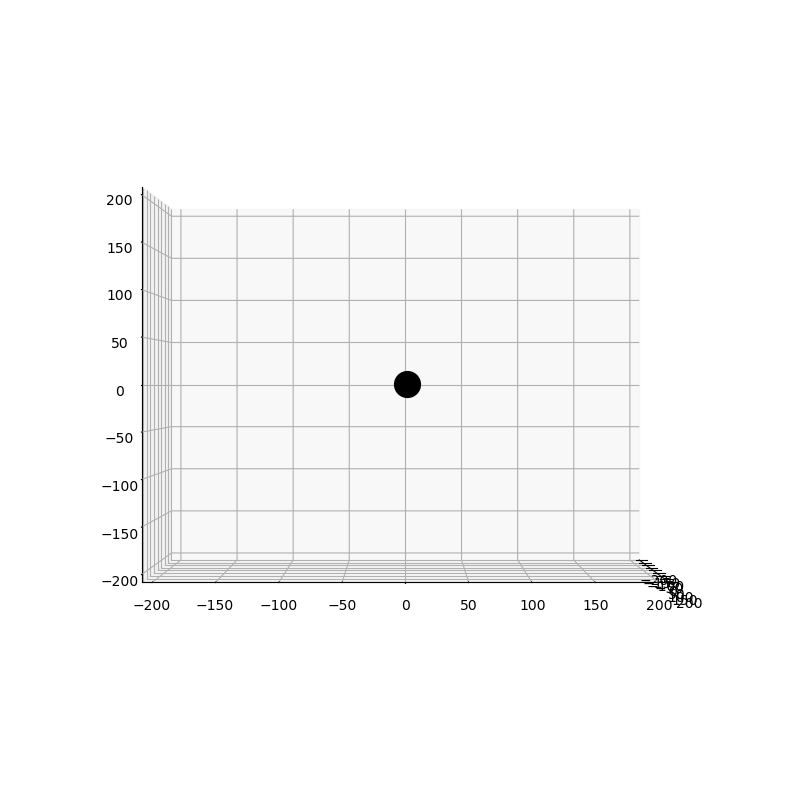

In [33]:
solar_system = SolarSystem(400)

body = SolarSystemBody(solar_system, 100, velocity = (1, 1, 1))

for _ in range(100):
    solar_system.update_all()
    solar_system.draw_all()